In [ ]:
#Formatting input data for fed by LSTM architecture
#Formatting input data for fed by LSTM architecture
#Formatting input data for fed by LSTM architecture

In [1]:
import random
random.seed(123)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
import scipy.stats as stats

In [2]:
sns.set_style("whitegrid")
#sns.set_palette('Set1')

In [36]:
# declare name of input data according to the home folder you are considering
input_data = "FromJsontoRawstream_earthquake8_Pre_CNN_Accumulate10secondsPredZERO_Ori_korea.csv"
df = pd.read_csv("../resources/data/earthquake/Earthquake1/"+ input_data ,header=None,names=['col0','col1','col2'],sep=",")

In [5]:
df.drop('col0', axis=1, inplace=True)
df.drop('col1', axis=1, inplace=True)

In [52]:
#Show for viewing
df.head(10)

,col0,col1,col2
0,1.474138e+12,09/17/2016 18:39:16,0
1,1.474138e+12,09/17/2016 18:39:26,0
2,1.474138e+12,09/17/2016 18:39:36,0
3,1.474138e+12,09/17/2016 18:39:46,0
4,1.474138e+12,09/17/2016 18:39:56,0
5,1.474138e+12,09/17/2016 18:40:06,0
6,1.474138e+12,09/17/2016 18:40:16,0
7,1.474138e+12,09/17/2016 18:40:26,0
8,1.474138e+12,09/17/2016 18:40:36,0
9,1.474138e+12,09/17/2016 18:40:46,0


In [9]:
#Kich thuoc du lieu
print df.shape

(25492, 1)


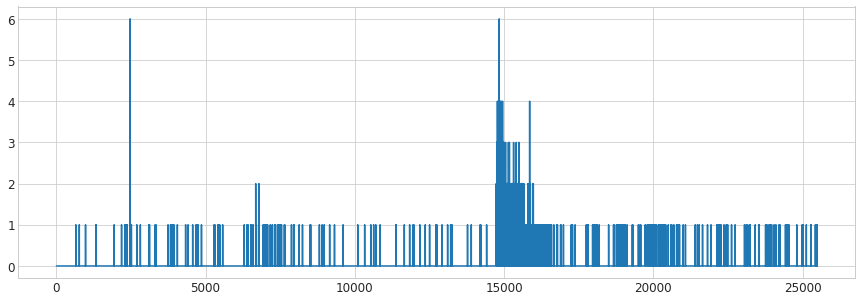

In [35]:
fig = plt.figure(figsize=(15,5))
df['col2'].plot()
plt.show()

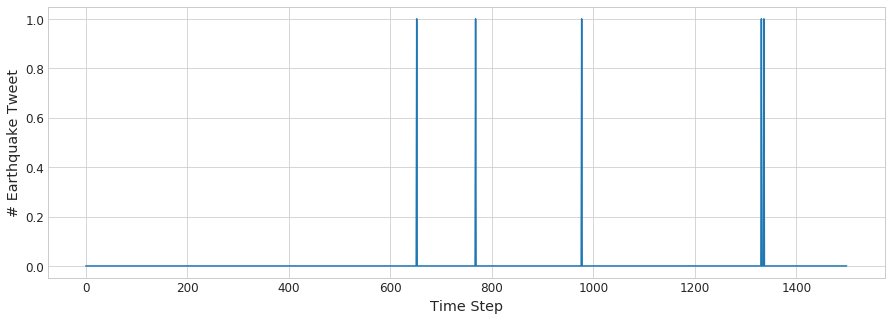

In [11]:
#tin hieu o trang thai khong co dong dat Without earthquake event situation
fig = plt.figure(figsize=(15,5))
df0 = df['col2'][0:1500]
plt.plot(df0)
plt.xlabel("Time Step")
plt.ylabel("# Earthquake Tweet")
plt.show()
pp = PdfPages("No earthquake")
pp.savefig(fig)
pp.close()

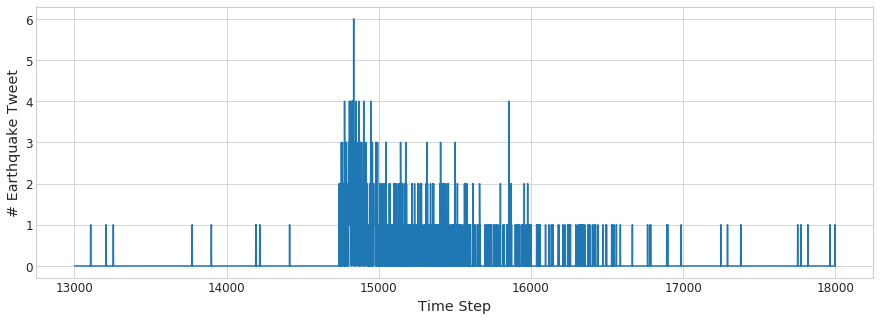

In [12]:
#isolate earthquake event [anomaly1]
fig1 = plt.figure(figsize=(15,5))
df1= df['col2'][13000:18000]
plt.plot(df1)
plt.xlabel("Time Step")
plt.ylabel("# Earthquake Tweet")
plt.show()
pp = PdfPages("earthquake event")
pp.savefig(fig1)
pp.close()

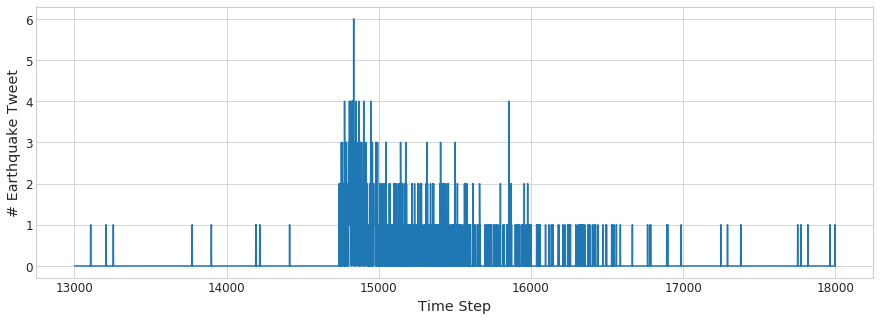

In [13]:
#isolate anomaly 2
fig2 = plt.figure(figsize=(15,5))
df2= df['col2'][13000:18000]
plt.plot(df2)
plt.xlabel("Time Step")
plt.ylabel("# Earthquake Tweet")
plt.show()
pp = PdfPages("earthquake event")
pp.savefig(fig2)
pp.close()

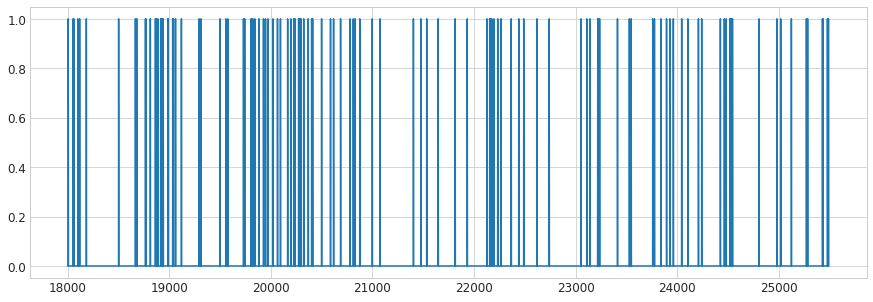

In [34]:
#isolate end sequence
fig3 = plt.figure(figsize=(15,5))
df3= df['col2'][18000:25492]
plt.plot(df3)
plt.show()

In [15]:
df['anomaly'] = 0
df.head(28750)

,col2,anomaly
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Size of test: 25492
Size of validation1: 5000
Size of validation2: 25492
Size of train: 20492
Total: 76476
Ratio of test: 0.333333
Ratio of validation1: 0.065380
Ratio of validation2: 0.333333
Ratio of train: 0.267953


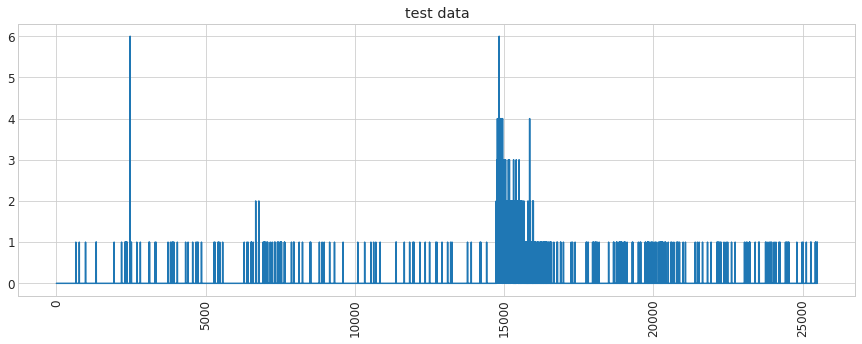

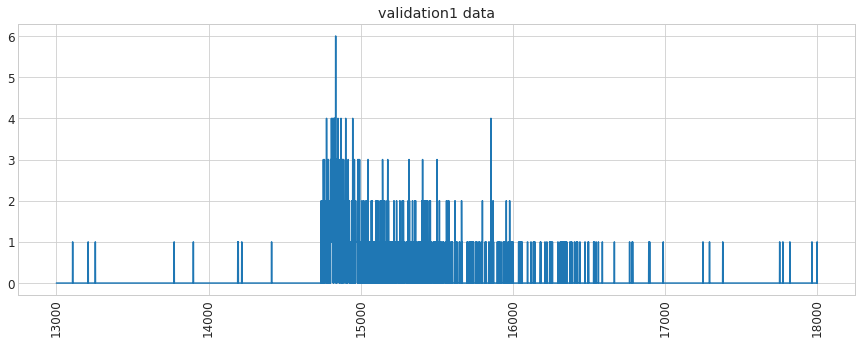

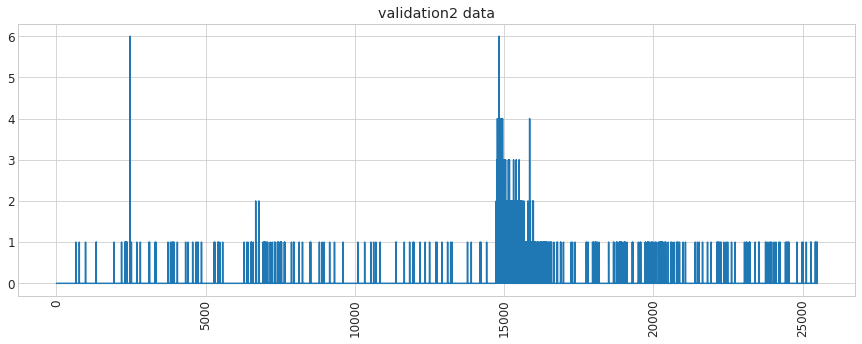

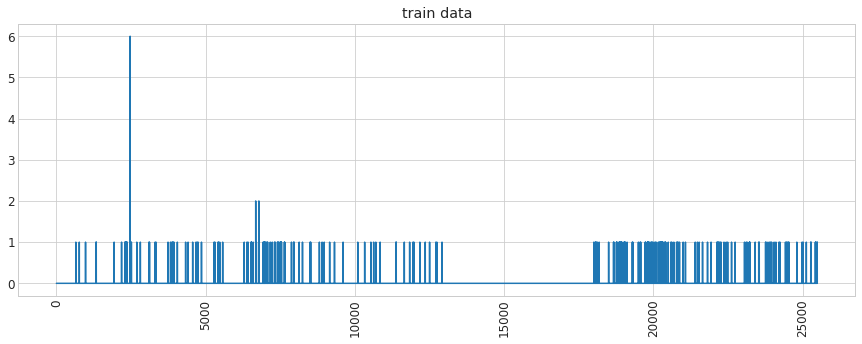

In [16]:
df_anomaly1 = df[13000:18000]
df_test = df

df_validation1= df[13000:18000]

df_not_train = df_anomaly1
df_train = df[~df.isin(df_not_train)].dropna()
df_validation2 = df_test

df_dict = {}
df_dict['train'] = df_train
df_dict['test'] = df_test
df_dict['validation1'] = df_validation1
df_dict['validation2'] = df_validation2

count = 0
for key in df_dict:
    print "Size of %s: %d"%(key,df_dict[key].shape[0])
    count += df_dict[key].shape[0]
print "Total: %d"%(count)

for key in df_dict:
    print "Ratio of %s: %f"%(key,float(df_dict[key].shape[0])/count)

    
for key in df_dict:
    df_tmp = df_dict[key]
    plt.figure()
    df_tmp['col2'].plot(figsize=(15,5))
    rows = df_tmp[df_tmp.anomaly.isin([1])].itertuples()
    for row in rows:
        print row
        plt.plot(row[0], row[1], 'r.', markersize=10.0)
    plt.xticks(rotation='vertical')
    plt.title("%s data"%(key))
    plt.show()

In [18]:
for key in df_dict:
    np.save("../resources/data/earthquake/Earthquake1/%s"%(key),df_dict[key])

In [37]:
#Earthquake detection start here
#Earthquake detection start here
#Earthquake detection start here
#Earthquake detection start here

In [38]:
data_folder = "../resources/data/earthquake/Earthquake1/"

In [39]:
#load training data
train_predictions = np.load(data_folder+"train_predictions.npy")
train_true = np.load(data_folder+"train_true.npy")
print train_predictions.shape
print train_true.shape

(20490, 1)
(20490,)


In [40]:
#load validation2 data
validation2_predictions = np.load(data_folder+"validation2_predictions.npy")
validation2_true = np.load(data_folder+"validation2_true.npy")
validation2_labels = np.load(data_folder+"validation2_labels.npy")
print np.shape(validation2_predictions)
print np.shape(validation2_true)
print np.shape(validation2_labels)
validation2_labels = np.reshape(validation2_labels,[len(validation2_labels),np.shape(validation2_labels)[1]])
print np.shape(validation2_labels)

(25490, 1)
(25490,)
(25490, 1, 1)
(25490, 1)


In [41]:
# load test data
test_predictions = np.load(data_folder+"test_predictions.npy")
test_true = np.load(data_folder+"test_true.npy")
test_labels = np.load(data_folder+"test_labels.npy")
print np.shape(test_predictions)
print np.shape(test_true)
test_labels = np.reshape(test_labels,[len(test_labels),np.shape(test_labels)[1]])
print np.shape(test_labels)

(25490, 1)
(25490,)
(25490, 1)


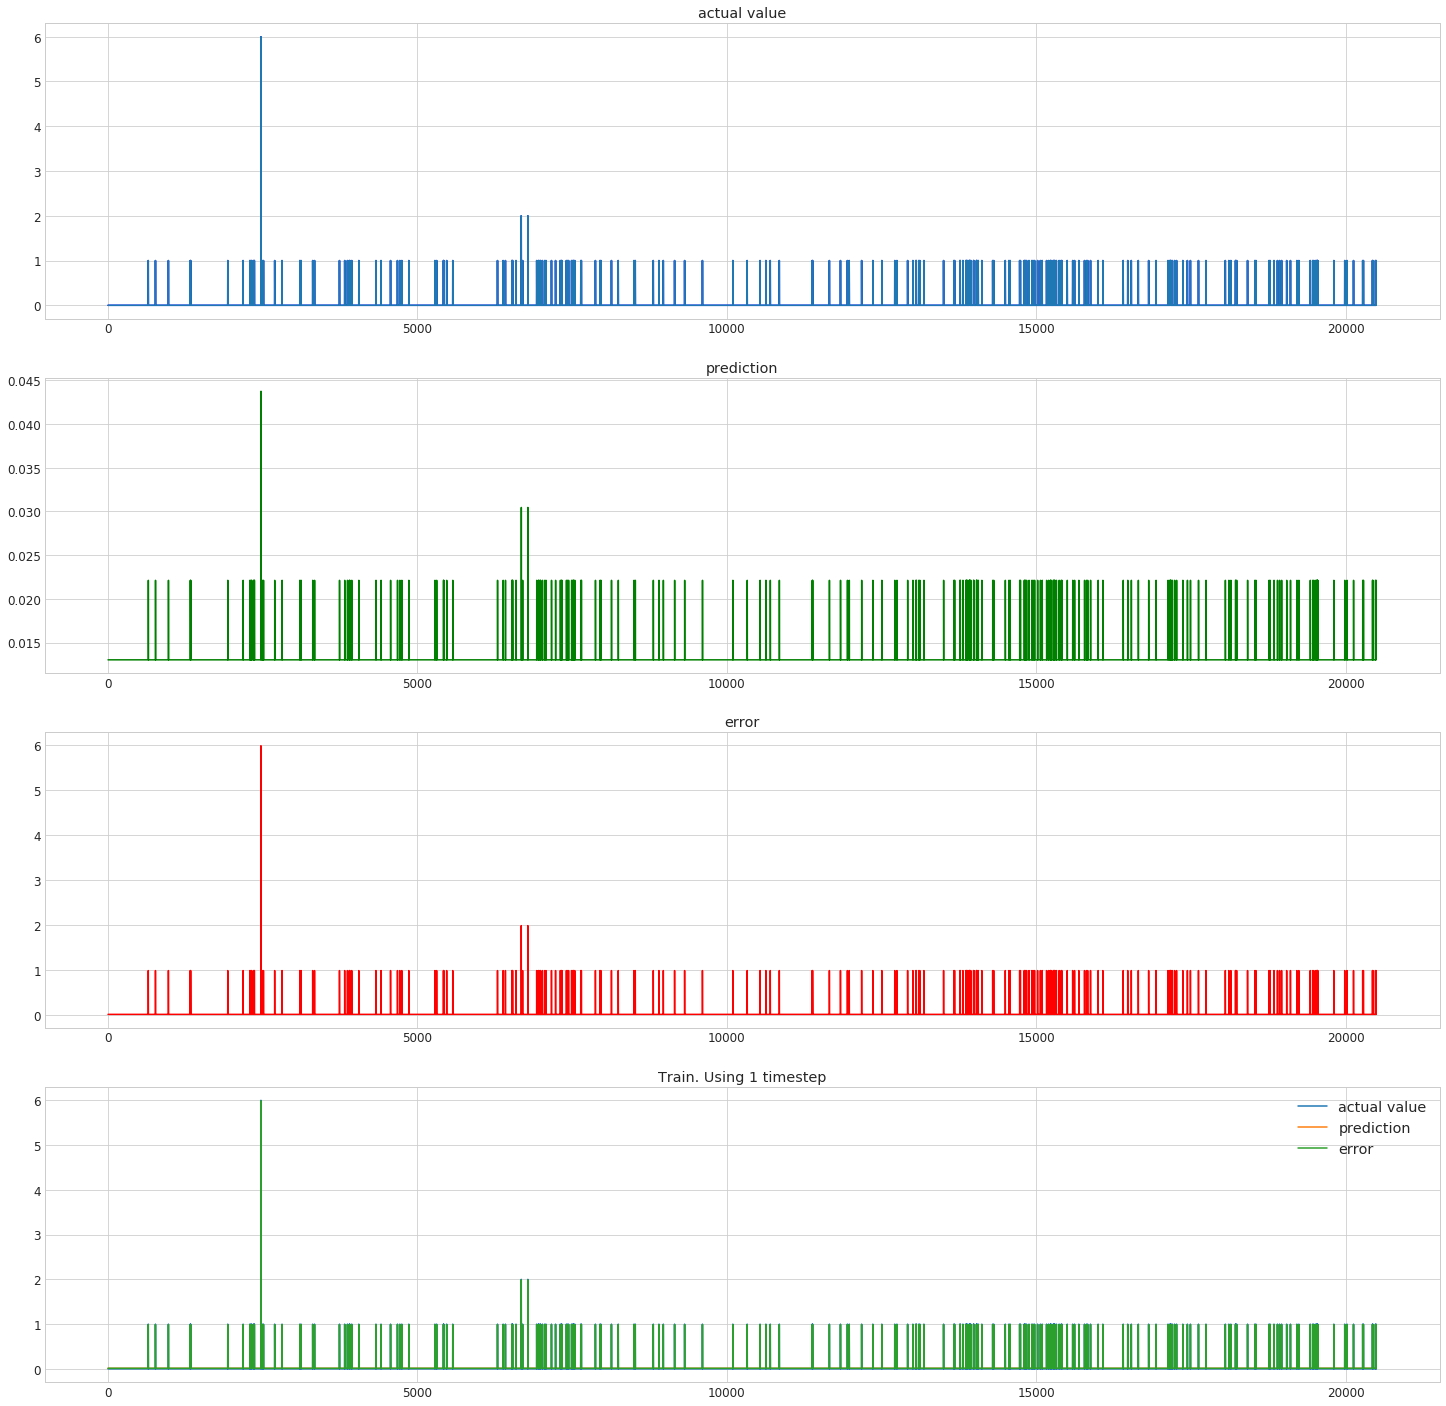

In [42]:
plt.figure(figsize=(25,25))
plt.subplot(411)
plt.plot(train_true, 'b-', label= 'actual value')
plt.title("actual value")
plt.plot(train_true,label='actual value')

plt.subplot(412)
plt.plot(train_predictions[:,0], 'g-', label='prediction')
plt.title("prediction")

plt.subplot(413)
plt.plot(abs(train_true - train_predictions[:,0]),'r-',label='error')
plt.title("error")

plt.subplot(414)
plt.plot(train_true,label='actual value')
plt.plot(train_predictions[:,0],label='prediction')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")

plt.show()

0.0247750593016625
0.11380575957117676


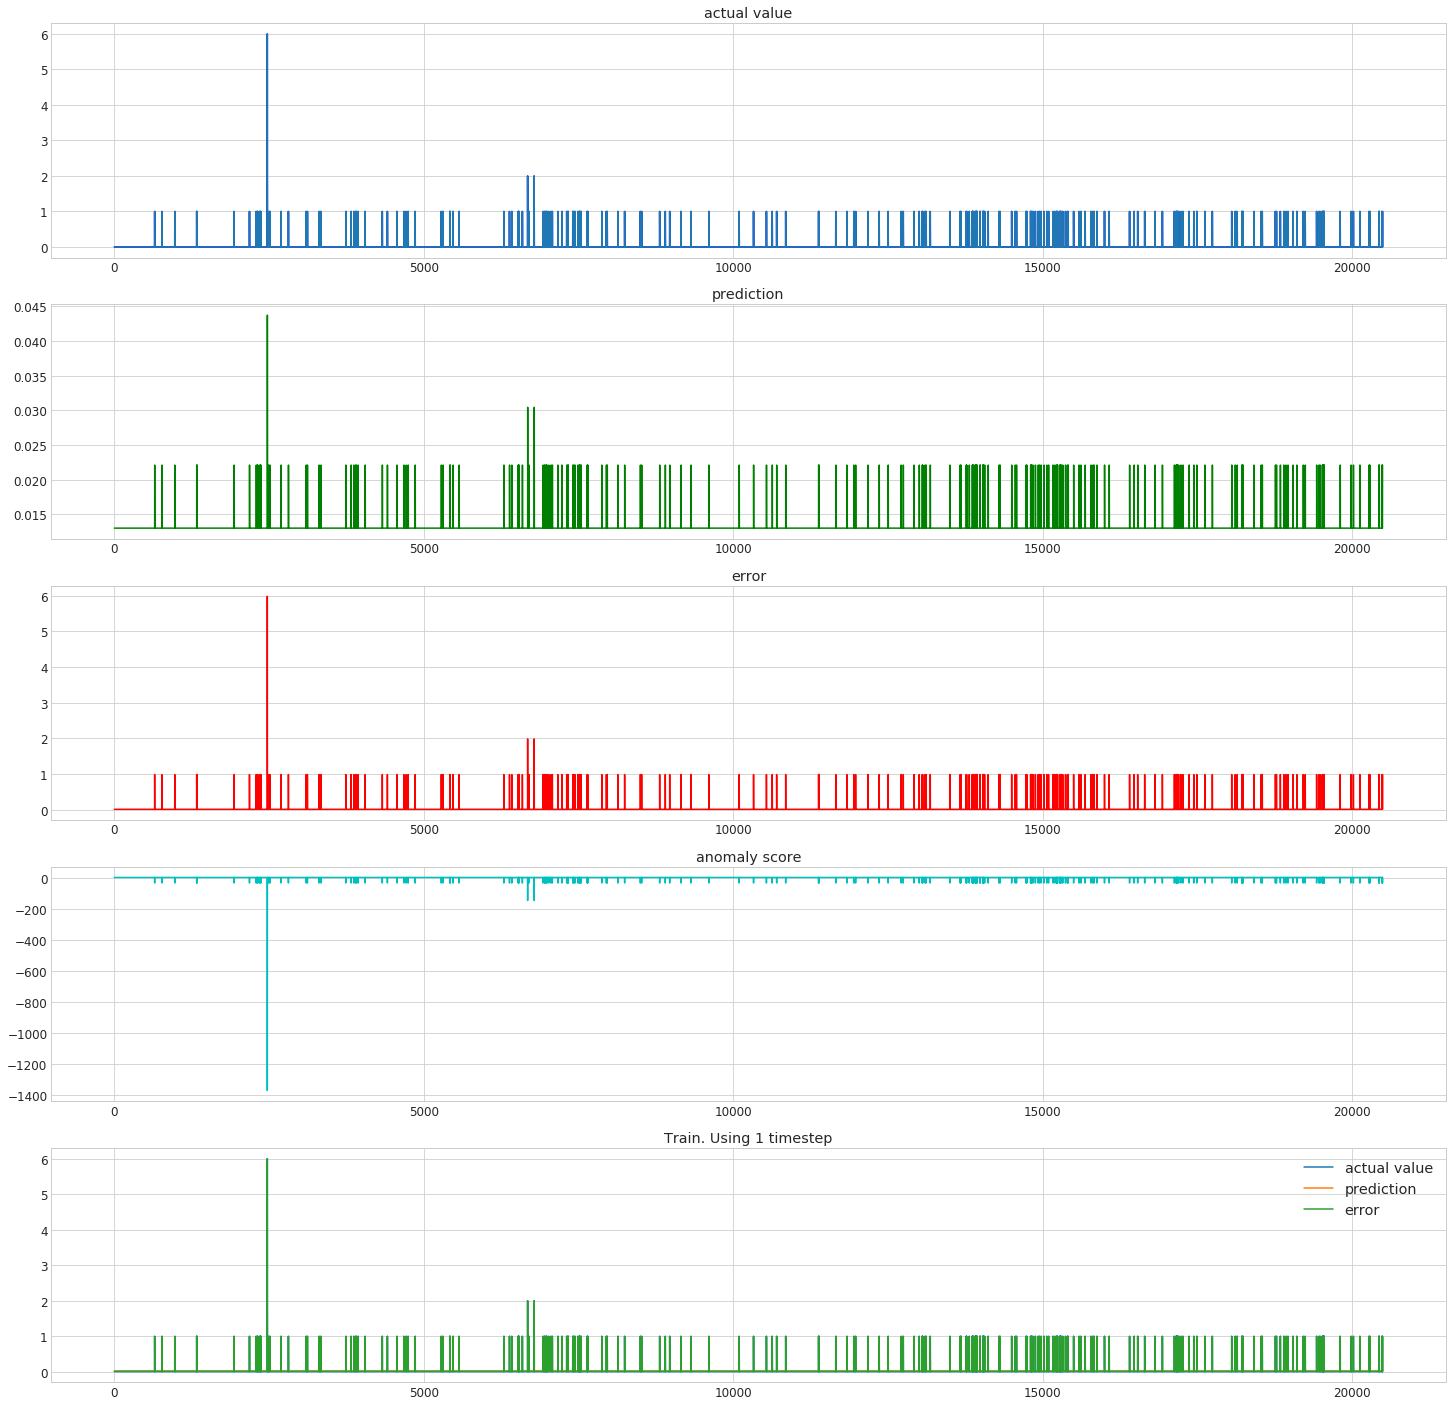

In [43]:
#error vectors
from scipy.stats import norm

train_error_vectors = np.zeros(np.shape(train_predictions))
n_cols = np.shape(train_predictions)[1]
for i in range(n_cols):
    train_error_vectors[:,i] =  np.abs(train_true -train_predictions[:,i])

#ERROR DIMENSION
error_dimension = 1
train_error_vectors = train_error_vectors[:,0:error_dimension]
mean = np.mean(train_error_vectors)
std = np.std(train_error_vectors)
print mean
print std
p_values= norm(loc=mean, scale=std).logpdf(train_error_vectors)

plt.figure(figsize=(25,25))
plt.subplot(511)
plt.plot(train_true, 'b-', label= 'actual value')
plt.title("actual value")
plt.plot(train_true,label='actual value')

plt.subplot(512)
plt.plot(train_predictions[:,0], 'g-', label='prediction')
plt.title("prediction")

plt.subplot(513)
plt.plot(abs(train_true - train_predictions[:,0]),'r-',label='error')
plt.title("error")

plt.subplot(515)
plt.plot(train_true,label='actual value')
plt.plot(train_predictions[:,0],label='prediction')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")

plt.subplot(514)
plt.plot(p_values,'c-')
plt.title("anomaly score")
plt.show()

train_errors_1 = train_true - train_predictions[:,0]

In [44]:
v2_error_vectors = np.zeros(np.shape(validation2_predictions))
for i in range(n_cols):
    v2_error_vectors[:,i] =  np.abs(validation2_true -validation2_predictions[:,i])

v2_error_vectors = v2_error_vectors[:,0:error_dimension]
v2_p_values= norm(loc=mean, scale=std).logpdf(v2_error_vectors)

print 
test_error_vectors = np.zeros(np.shape(test_predictions))
for i in range(n_cols):
    test_error_vectors[:,i] =  test_true -test_predictions[:,i]
test_error_vectors = test_error_vectors[:,0:error_dimension]
test_p_values= norm(loc=mean, scale=std).logpdf(test_error_vectors)
test_true_anomalies = np.where(test_labels[:,0]==1)

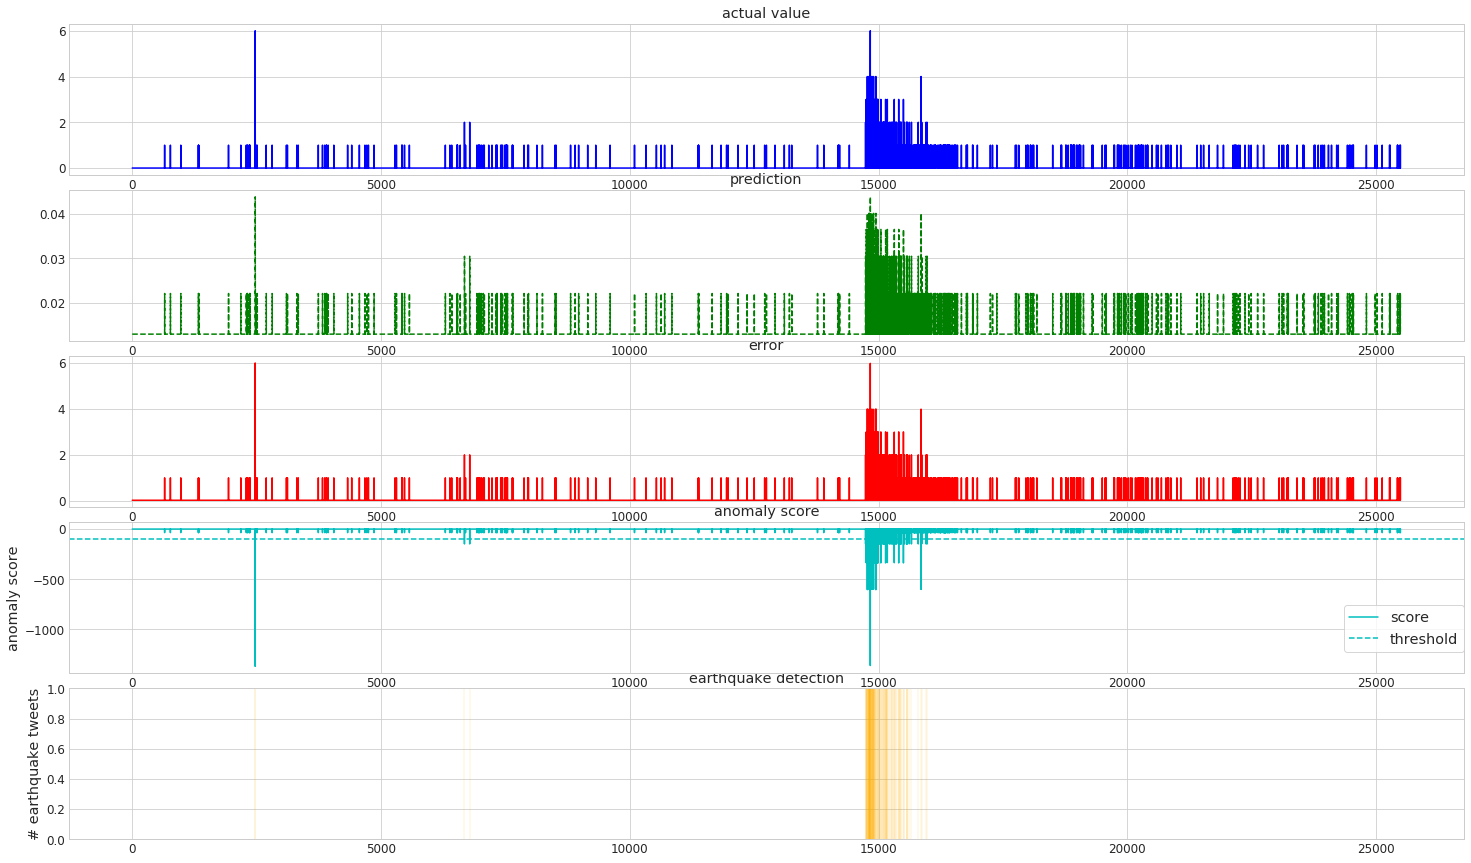

In [45]:
threshold_v2 = -100

f = plt.figure(figsize=(25,15))
plt.subplots_adjust(hspace=0.1)

v2_below_threshold = np.where(v2_p_values <= threshold_v2)

#print v2_below_threshold

ax1 = plt.subplot(511)
ax1.plot(validation2_true,label='actual value',color='b')
plt.title("actual value")

ax2 = plt.subplot(512,sharex=ax1)
ax2.plot(validation2_predictions[:,0],ls ='dashed',label='prediction',color='g')
plt.title("prediction")

ax3 = plt.subplot(513, sharex=ax1)
ax3.plot(abs(validation2_true - validation2_predictions[:,0]),label='error',color='r')
plt.title("error")

ax5 = plt.subplot(515, sharex=ax1)
for column in v2_below_threshold[0]:
    ax5.axvline(x=column,color=sns.xkcd_rgb["amber"],alpha=.1)
#for row in v2_true_anomalies:
#    plt.plot(row, validation2_true[row], 'r.', markersize=20.0)

plt.ylabel("# earthquake tweets")
plt.title("earthquake detection")


#plot v2 log PD
ax4 = plt.subplot(514, sharex=ax1)
ax4.plot(v2_p_values,label='score',color='c')
ax4.axhline(y=threshold_v2,ls='dashed',label='threshold',color='c')
ax4.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("anomaly score")
plt.title("anomaly score")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
# xticklabels = ax1.get_xticklabels()
# plt.setp(xticklabels, visible=False)
# plt.xlabel("time")
plt.show()
pp = PdfPages('earthquake1 tweets_v2.pdf')
pp.savefig(f)
pp.close()

[ 2471  2472  6677  6783 14739 14744 14746 14753 14754 14760 14766 14769
 14771 14772 14774 14777 14784 14786 14787 14795 14801 14802 14803 14805
 14806 14807 14809 14810 14812 14813 14814 14815 14816 14817 14819 14821
 14823 14824 14825 14826 14828 14829 14830 14831 14832 14833 14834 14837
 14839 14840 14844 14846 14848 14849 14854 14861 14862 14865 14866 14869
 14872 14875 14878 14880 14881 14882 14884 14887 14888 14894 14897 14898
 14899 14900 14902 14903 14909 14914 14916 14917 14919 14920 14924 14940
 14946 14949 14957 14965 14979 14980 14984 14988 14991 15007 15019 15033
 15038 15046 15047 15068 15074 15098 15099 15103 15106 15112 15127 15138
 15142 15143 15145 15148 15156 15171 15172 15175 15176 15181 15217 15234
 15256 15271 15272 15279 15310 15316 15319 15339 15354 15359 15401 15405
 15416 15419 15428 15435 15449 15456 15500 15515 15516 15562 15572 15573
 15577 15618 15661 15798 15854 15868 15955 15977]


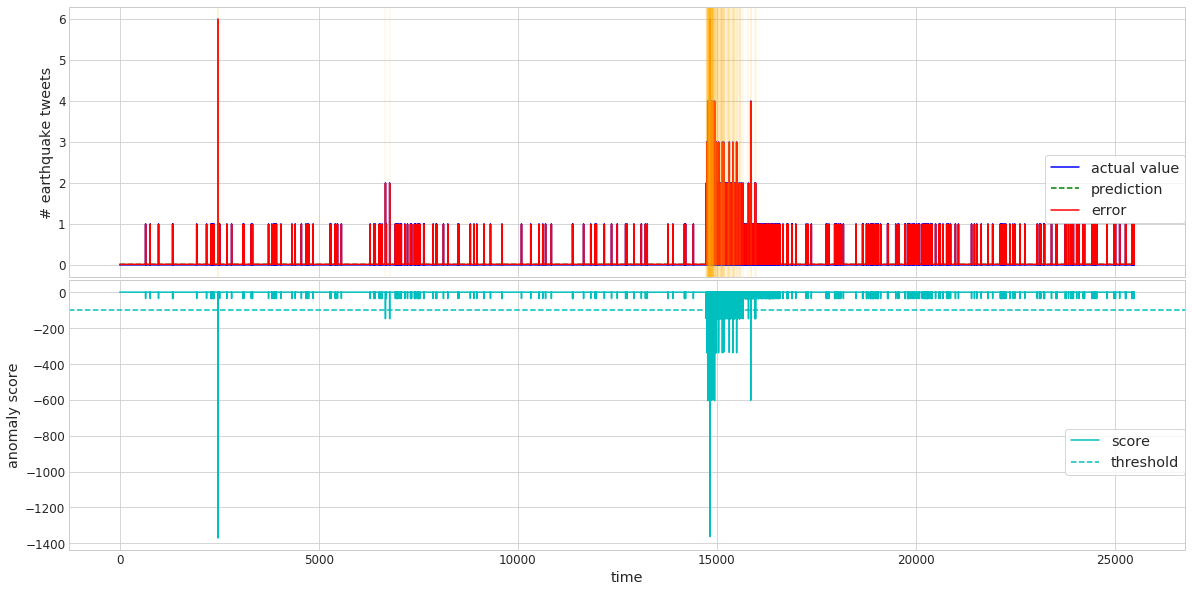

In [46]:
test_below_threshold = np.where(test_p_values <= threshold_v2)
print test_below_threshold[0]
#plot test data
f = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.01)

ax1 = plt.subplot(211)
ax1.plot(test_true,label='actual value',color='b')
ax1.plot(test_predictions[:,0],ls ='dashed',label='prediction',color='g')
ax1.plot(abs(test_true - test_predictions[:,0]),label='error',color='r')
for column in test_below_threshold[0]:
    ax1.axvline(x=column,color=sns.xkcd_rgb["amber"],alpha=0.1)
#for row in test_true_anomalies:
#    plt.plot(row, test_true[row], 'r.', markersize=20.0)
ax1.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("# earthquake tweets")
#plt.title("Test. Using 1 timestep")

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(test_p_values,label='score',color='c')
ax2.axhline(y=threshold_v2,ls='dashed',label='threshold',color='c')
ax2.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("anomaly score")
#plt.title("test p-values")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("time")
plt.show()
pp = PdfPages('Earthquake_test.pdf')
pp.savefig(f)
pp.close()

In [47]:
test_below_threshold[0]

array([ 2471,  2472,  6677,  6783, 14739, 14744, 14746, 14753, 14754,
       14760, 14766, 14769, 14771, 14772, 14774, 14777, 14784, 14786,
       14787, 14795, 14801, 14802, 14803, 14805, 14806, 14807, 14809,
       14810, 14812, 14813, 14814, 14815, 14816, 14817, 14819, 14821,
       14823, 14824, 14825, 14826, 14828, 14829, 14830, 14831, 14832,
       14833, 14834, 14837, 14839, 14840, 14844, 14846, 14848, 14849,
       14854, 14861, 14862, 14865, 14866, 14869, 14872, 14875, 14878,
       14880, 14881, 14882, 14884, 14887, 14888, 14894, 14897, 14898,
       14899, 14900, 14902, 14903, 14909, 14914, 14916, 14917, 14919,
       14920, 14924, 14940, 14946, 14949, 14957, 14965, 14979, 14980,
       14984, 14988, 14991, 15007, 15019, 15033, 15038, 15046, 15047,
       15068, 15074, 15098, 15099, 15103, 15106, 15112, 15127, 15138,
       15142, 15143, 15145, 15148, 15156, 15171, 15172, 15175, 15176,
       15181, 15217, 15234, 15256, 15271, 15272, 15279, 15310, 15316,
       15319, 15339,

In [48]:
test_below_threshold[0][0]

2471

In [49]:
df = pd.read_csv("../resources/data/earthquake/Earthquake1/" + input_data,header=None,names=['col0','col1','col2'],sep=",")

In [50]:
df['col1'][14739]

'09/19/2016 11:35:46'

In [51]:
# FINISH NOTEBOOK